In [80]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [81]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [97]:
label = LabelEncoder()
for col in df.columns:
    df[col] = label.fit_transform(df[col])

df.head()

,class,gill-color,spore-print-color,population,gill-size,odor,bruises,stalk-shape,stalk-color-above-ring,stalk-root
0,1,4,2,3,1,6,1,0,7,3
1,0,4,3,2,0,0,1,0,7,2
2,0,5,3,2,0,3,1,0,7,2
3,1,5,2,3,1,6,1,0,7,3
4,0,4,3,0,0,5,0,1,7,3


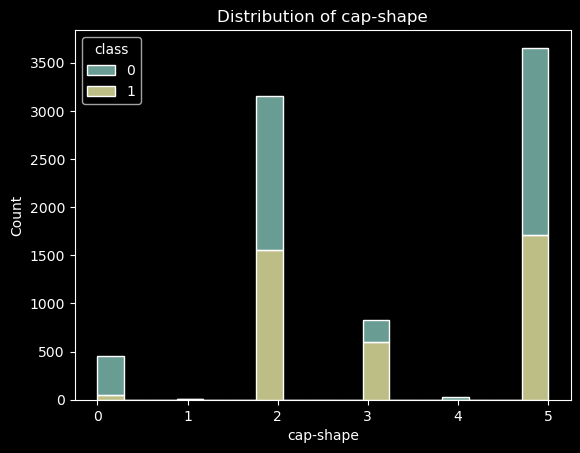

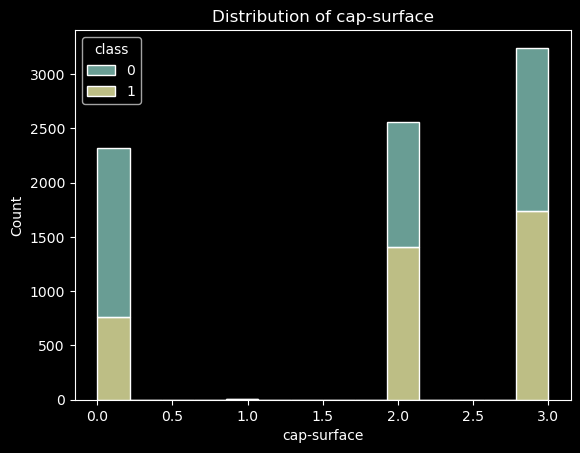

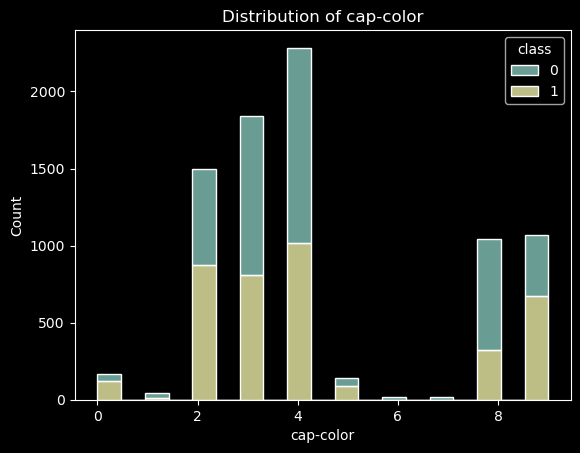

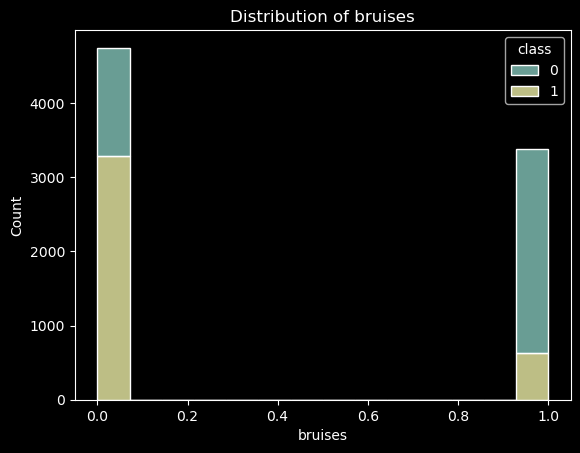

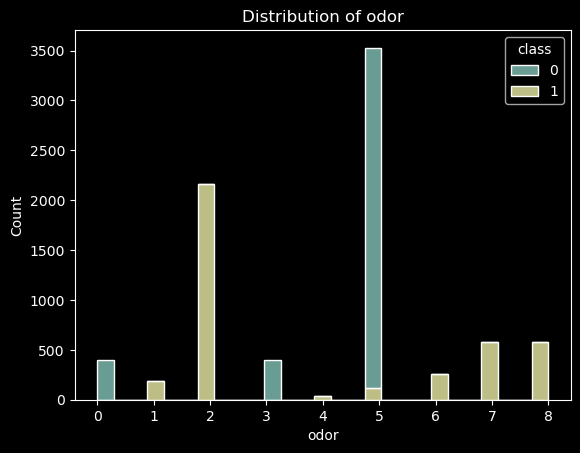

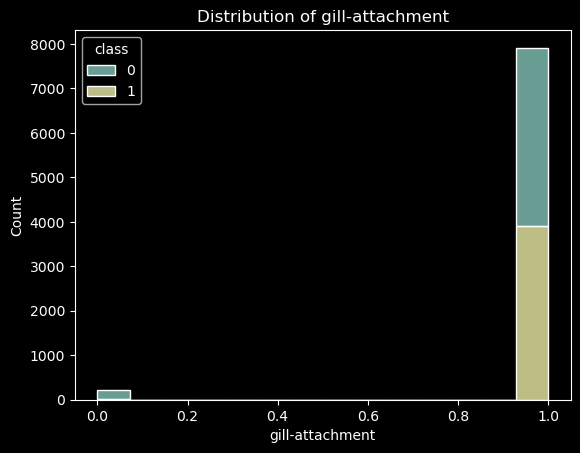

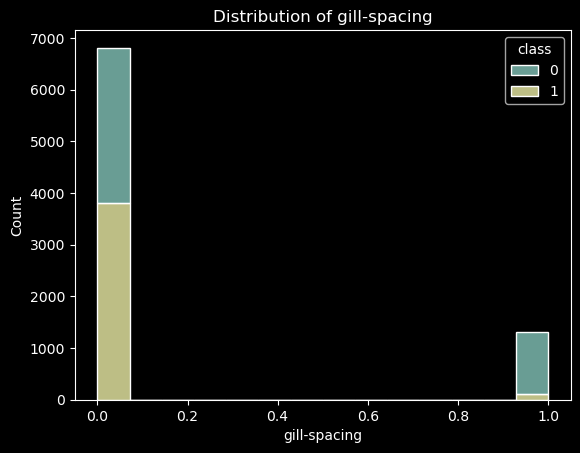

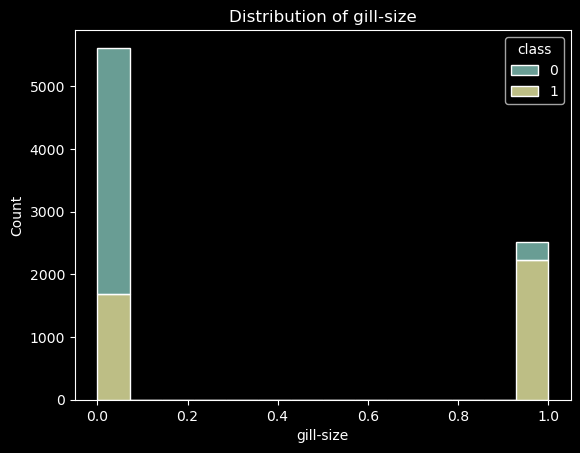

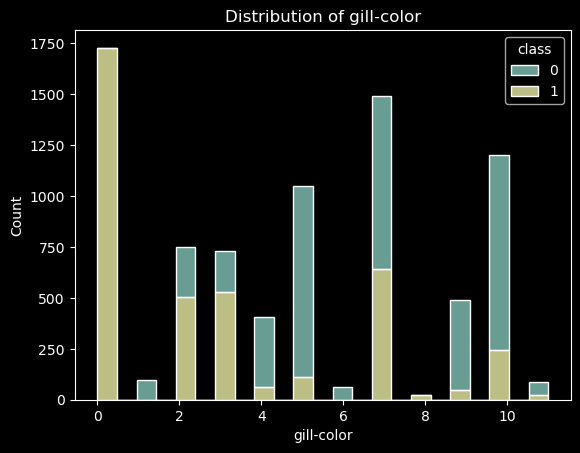

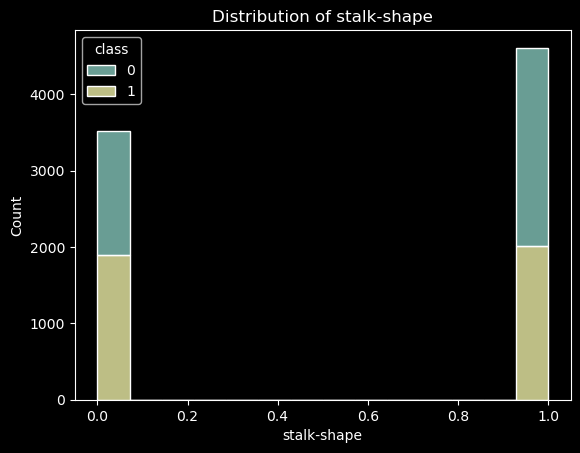

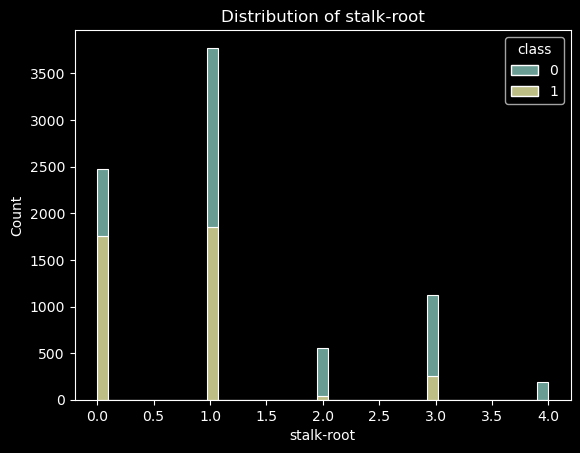

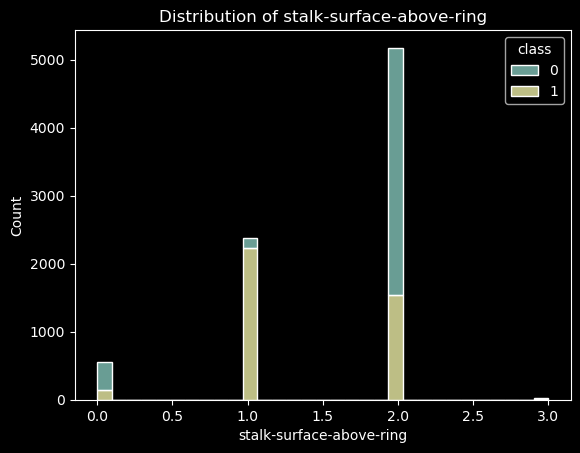

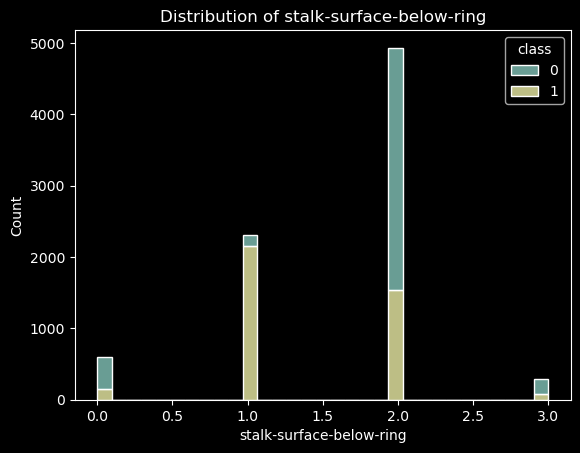

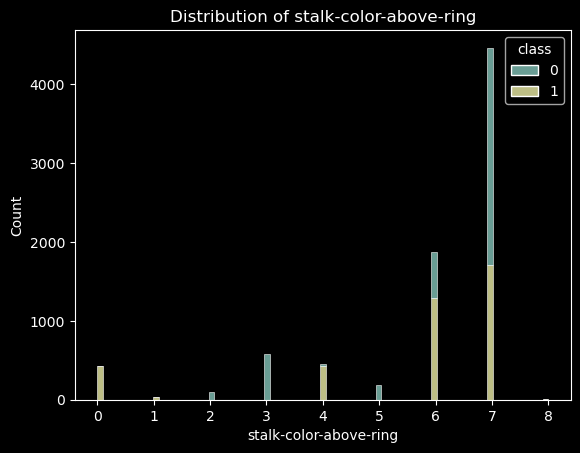

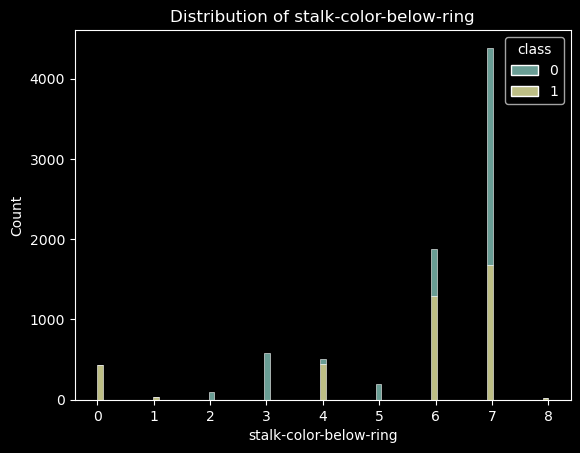

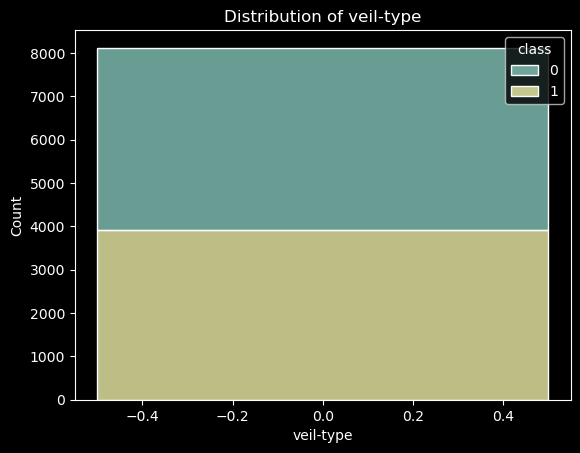

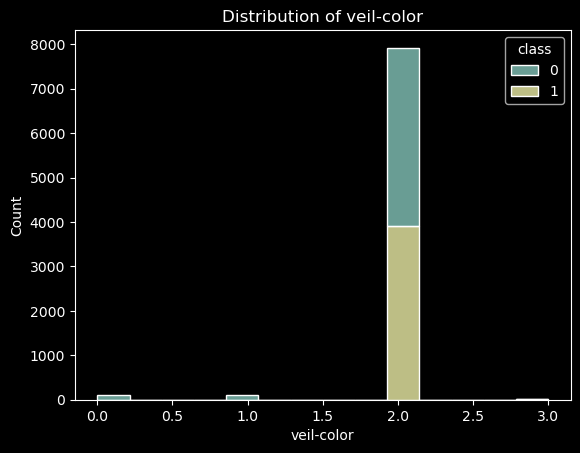

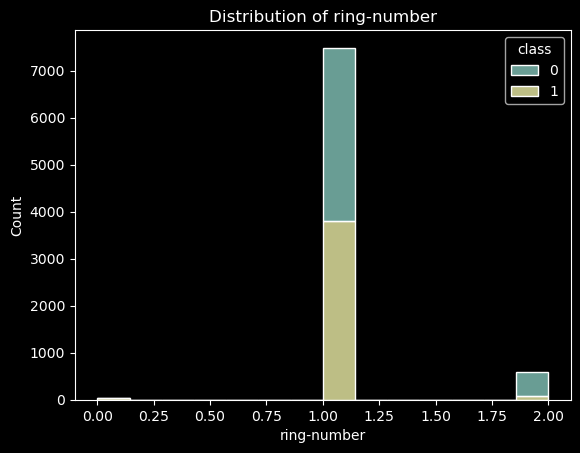

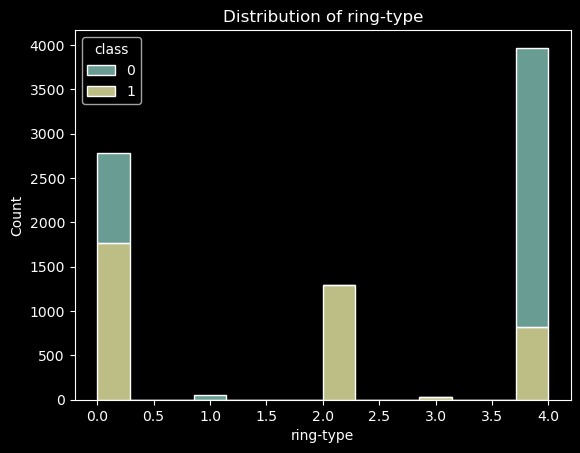

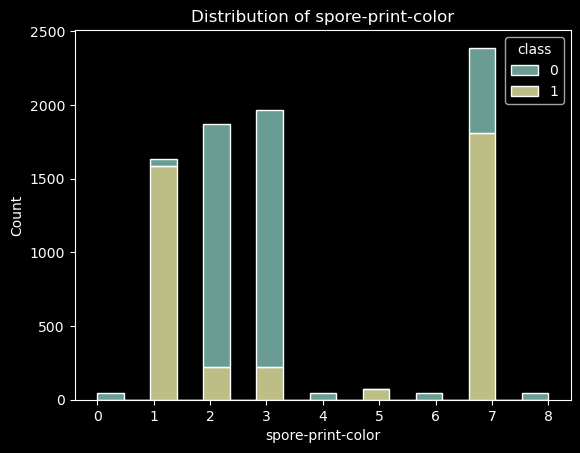

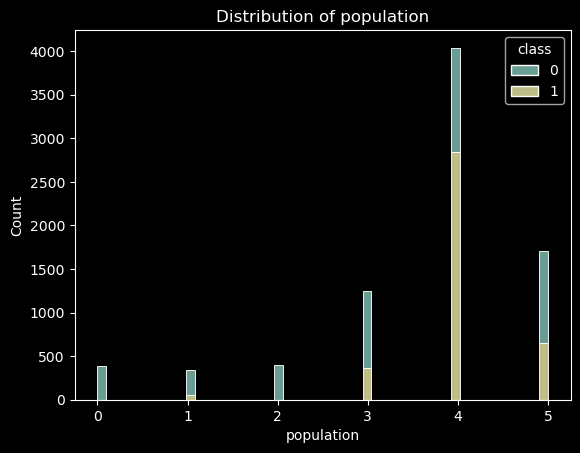

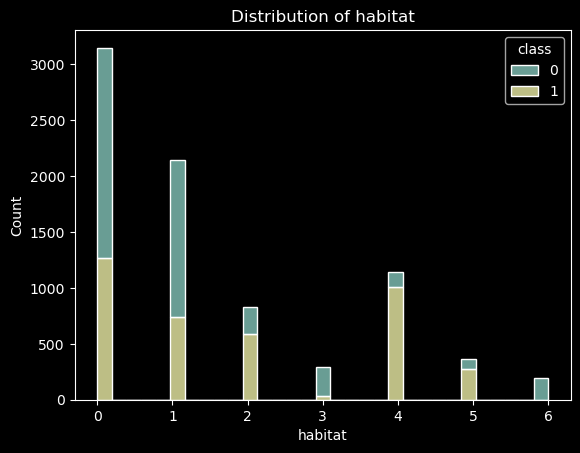

In [84]:
X = df.drop(["class"], axis="columns")

for column in X.columns:
    plt.figure()
    sns.histplot(data=df, x=column, hue='class', multiple='stack')
    plt.title(f'Distribution of {column}')
    plt.show()

In [85]:
df.drop(["veil-type"], axis="columns",inplace=True)

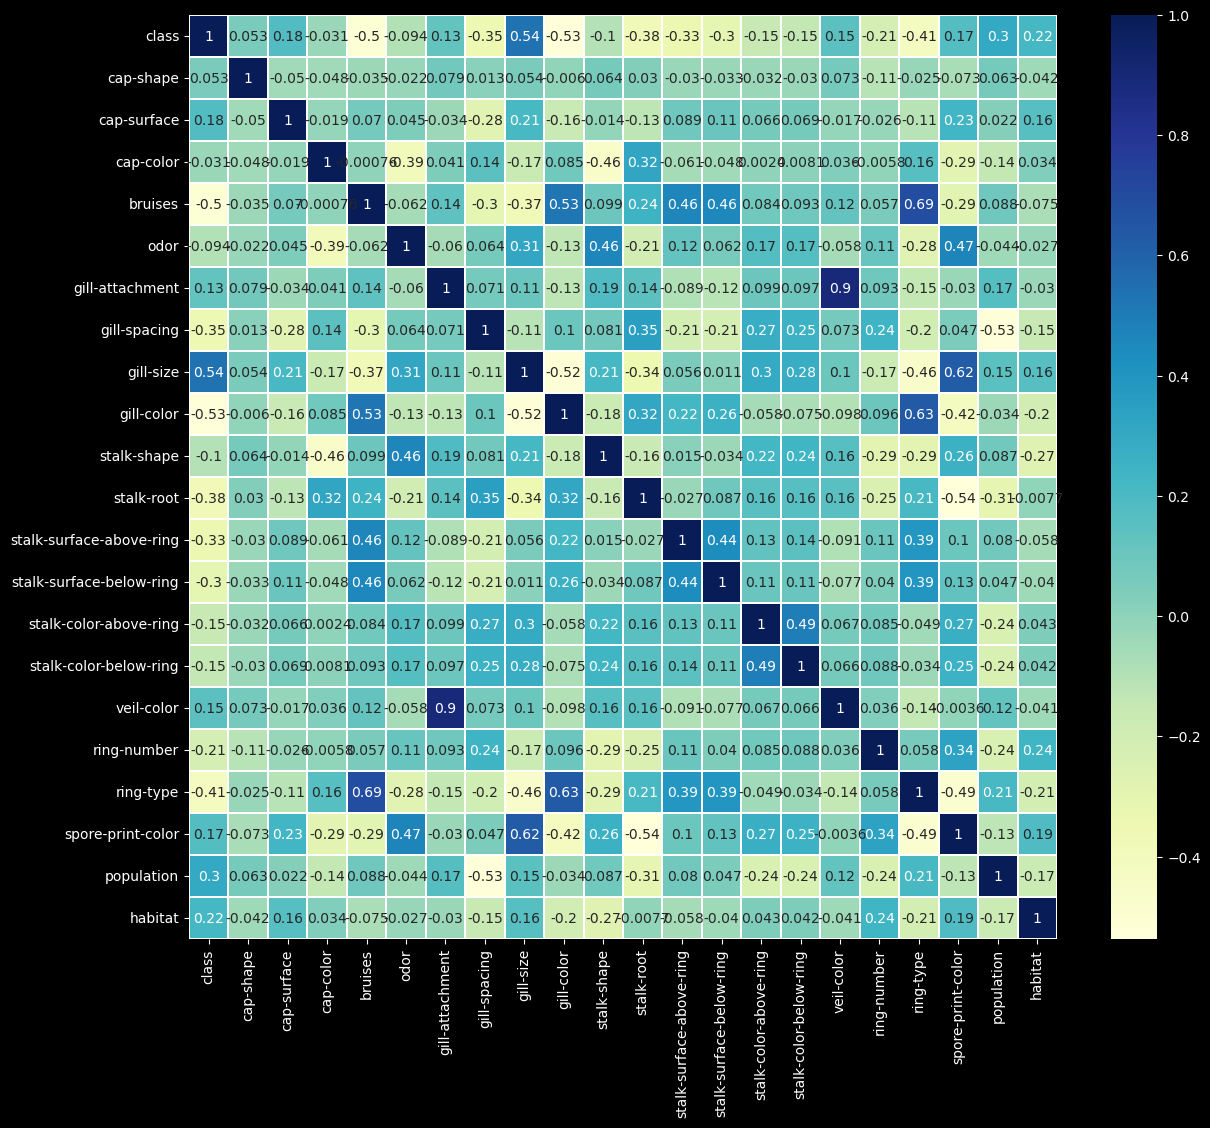

In [86]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

<Axes: title={'center': 'Correlation with target'}>

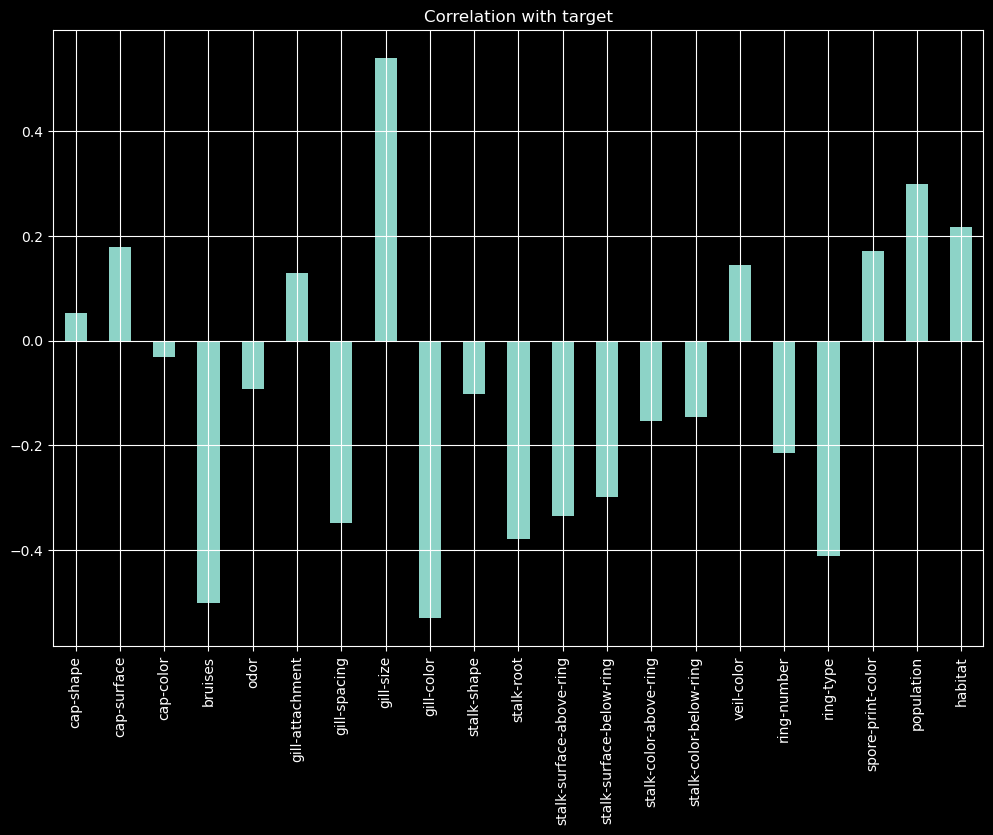

In [87]:
df.drop('class', axis=1).corrwith(df["class"]).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [88]:
df = df[["class", "gill-color", "spore-print-color", "population", "gill-size", "odor", "bruises", "stalk-shape", "stalk-color-above-ring", "stalk-root"]]

In [89]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)

In [90]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

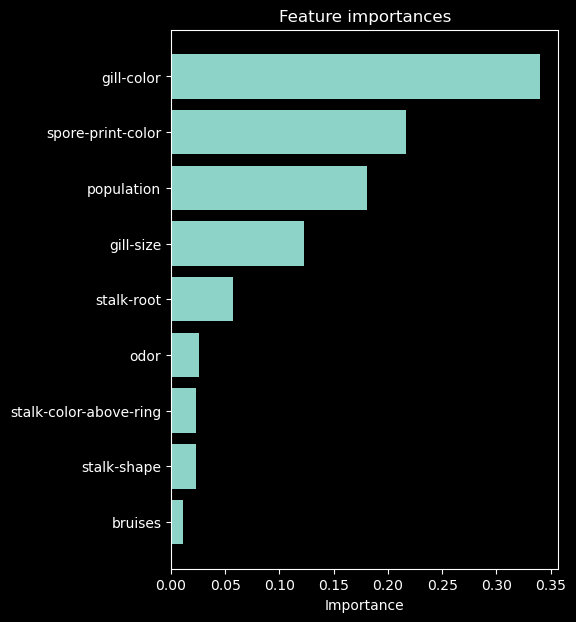

In [91]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [92]:
pickle.dump(clf, open("decissiontree.pkl", "wb"))

In [93]:
X_train

,gill-color,spore-print-color,population,gill-size,odor,bruises,stalk-shape,stalk-color-above-ring,stalk-root
4877,3,1,4,0,2,0,0,6,1
227,2,3,3,0,0,1,0,7,2
3123,5,2,4,0,5,1,1,7,1
5093,3,1,4,0,2,0,0,6,1
6768,0,7,4,1,8,0,1,6,0
...,...,...,...,...,...,...,...,...,...
5226,0,7,4,1,2,0,1,6,0
5390,10,7,1,0,5,1,0,7,0
860,10,3,5,0,3,1,0,7,4
7603,0,7,4,1,2,0,1,6,0


In [94]:
dfs = pd.read_csv("mushrooms.csv")

for column in dfs.columns:
    unique_values = dfs[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in class:
['p' 'e']

Unique values in cap-shape:
['x' 'b' 's' 'f' 'k' 'c']

Unique values in cap-surface:
['s' 'y' 'f' 'g']

Unique values in cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

Unique values in bruises:
['t' 'f']

Unique values in odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Unique values in gill-attachment:
['f' 'a']

Unique values in gill-spacing:
['c' 'w']

Unique values in gill-size:
['n' 'b']

Unique values in gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Unique values in stalk-shape:
['e' 't']

Unique values in stalk-root:
['e' 'c' 'b' 'r' '?']

Unique values in stalk-surface-above-ring:
['s' 'f' 'k' 'y']

Unique values in stalk-surface-below-ring:
['s' 'f' 'y' 'k']

Unique values in stalk-color-above-ring:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

Unique values in stalk-color-below-ring:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

Unique values in veil-type:
['p']

Unique values in veil-color:
['w' 'n' 'o' 'y']

Unique values in ring-num

In [95]:
X_test

,gill-color,spore-print-color,population,gill-size,odor,bruises,stalk-shape,stalk-color-above-ring,stalk-root
1971,3,3,3,0,5,0,1,7,3
6654,0,7,4,1,8,0,1,6,0
5606,0,7,4,1,2,0,1,7,0
3332,5,3,5,0,5,1,1,3,1
6988,0,7,4,1,7,0,1,6,0
...,...,...,...,...,...,...,...,...,...
3071,10,2,5,0,5,1,1,6,1
6733,0,7,4,1,7,0,1,6,0
63,2,3,2,0,3,1,0,7,2
6315,0,7,4,1,8,0,1,6,0
